In [19]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from IPython import display

In [2]:
# read X data
with open ('./dataset/20160/2_poles/slow_2mat_20160.pkl', 'rb') as fp:
    data_X1 = pickle.load(fp)
# with open ('./dataset/20160/2_poles/noise25/slow_2mat_20160.pkl', 'rb') as fp:
#     data_X2 = pickle.load(fp)
# with open ('./dataset/20160/2_poles/noise50/slow_2mat_20160.pkl', 'rb') as fp:
#     data_X3 = pickle.load(fp)
# with open ('./dataset/extra4000/2_poles/slow_2mat_e4000.pkl', 'rb') as fp:
#     data_X4 = pickle.load(fp)
# with open ('./dataset/extra4000/2_poles/noise25/slow_2mat_e4000.pkl', 'rb') as fp:
#     data_X5 = pickle.load(fp)
# data_X = np.concatenate([data_X1, data_X2, data_X3, data_X4, data_X5])
data_X = data_X1
print(data_X.shape)

(20148, 73, 2, 2)


In [3]:
# get shape
# assert dataset_size == data_X.shape[0]
dataset_size = data_X.shape[0]
freq_len = data_X.shape[1] # frequency steps
num_of_poles = data_X.shape[2] # number of poles use for tko
number_of_ch = data_X.shape[3] # number of channels, where 0=dipole, 1=monopole
input_shape = freq_len*num_of_poles*number_of_ch

In [4]:
# reduce dimension (flatten)
data_X_new = np.zeros([dataset_size, input_shape])
for i in range(dataset_size):
    data_X_new[i,0:freq_len] = data_X[i,:,1,0].flatten()
    data_X_new[i,freq_len:freq_len*2] = data_X[i,:,1,1].flatten()
    data_X_new[i,freq_len*2:freq_len*3] = data_X[i,:,0,0].flatten()
    data_X_new[i,freq_len*3:] = data_X[i,:,0,1].flatten()
data_X = data_X_new.copy()
del data_X_new

In [5]:
print(data_X.shape)

(20148, 292)


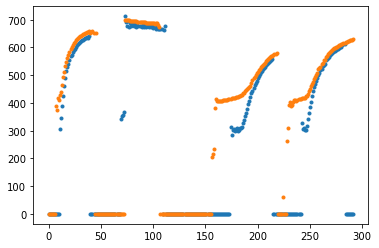

In [6]:
plt.plot(data_X[0, :],'.')
plt.plot(data_X[1000, :],'.')

In [7]:
# calc mu
mu_curve = np.zeros([data_X.shape[1]])
for i in range(dataset_size):
    mu_curve[:] += data_X[i, :]
mu_curve /= dataset_size
# calc std
std_curve = np.zeros([data_X.shape[1]])
for i in range(dataset_size):
    std_curve += (data_X[i, :] - mu_curve)**2/dataset_size
std_curve = np.sqrt(std_curve)
std_curve[np.where(std_curve == 0)] = 1

In [8]:
# load std c11
with open('std_curve_c11.pkl', 'rb') as fp:
    std_curve_c11 = pickle.load(fp)

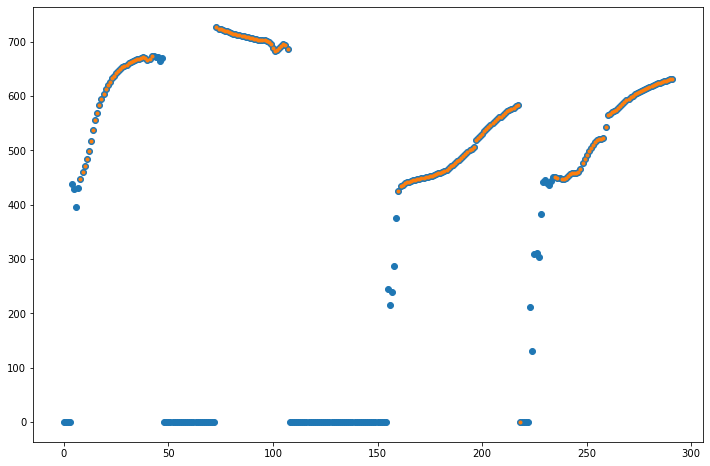

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
for i in range(0,dataset_size, 200):
    ax.cla()
    ax.plot(data_X[i, :], 'o', color='tab:blue')
    idx = np.where(std_curve_c11 > 0)[0]
    ax.plot(idx, data_X[i, idx], '.', color='tab:orange')
    display.display(fig)
    display.clear_output(wait = True)

In [ ]:
# Standardization
data_X_norm = np.copy(data_X)
for i in range(dataset_size):
    data_X_norm[i, :] -= mu_curve
    data_X_norm[i, :] /= std_curve
    # gain for c11!!!
    data_X_norm[i, :] *= std_curve_c11

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13,8)
ax[0].plot(mu_curve, '.')
ax[0].set_title('mu curve')
# --------------- #
ax[1].plot(std_curve, '.')
ax[1].set_title('std curve')

In [ ]:
# add noise
data_X += np.random.rand(data_X.shape[0],data_X.shape[1])-0.5

In [ ]:
# Standardization
data_X_norm = np.copy(data_X)
for i in range(dataset_size):
    data_X_norm[i, :] -= mu_curve
    data_X_norm[i, :] /= std_curve

In [ ]:
print('data_X mean:', np.mean(data_X_norm))
print('data_X min:', np.min(data_X_norm))
print('data_X max:', np.max(data_X_norm))

In [ ]:
plt.plot(data_X_norm[0, :],'.')
plt.plot(data_X_norm[1000, :],'.')

# data Y

In [52]:
from _sonic_inverse_tools import create_Y_data, calc_cij

In [65]:
data_Y, data_Y_idx = create_Y_data('./dataset/20160/ds_logfile_20160.txt', 20148)

In [66]:
for i in range(data_Y.shape[0]):
    data_Y[i,:] = calc_cij(data_Y[i,0], data_Y[i,1], data_Y[i,2], data_Y[i,3], data_Y[i,4], data_Y[i,5])

In [67]:
np.savetxt('test.txt', data_Y)